In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform #Import squareform, which creates a symmetric matrix from a vector
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '0' ]
matplotlib.__version__

'3.5.1'

In [2]:
data = pd.read_csv('wines.csv')
print(data.shape)

data.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic_Acid       178 non-null    float64
 2   Ash              178 non-null    float64
 3   Ash_Alkalinity   178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Total_Phenols    178 non-null    float64
 6   Flavonoids       178 non-null    float64
 7   Stilbenes        178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color_Intensity  178 non-null    float64
 10  Hue              178 non-null    float64
 11  OD280            178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

X = data

## Question 1

Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

In [5]:
C = np.cov(X.T)

In [6]:
eigvals, eigvecs = np.linalg.eig(C)

idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print(eigvals.shape, eigvecs.shape)
print("Number of eigenvalues above 1:", len(np.where(eigvals > 1)[0]))

(13,) (13, 13)
Number of eigenvalues above 1: 3


In [7]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

0.5540633835693526


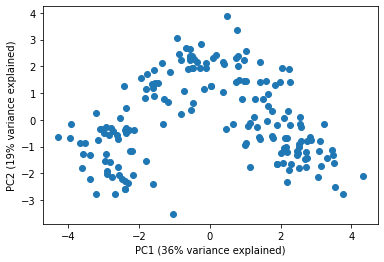

In [8]:
var = np.sum(pca.explained_variance_ratio_[:2])
print(var)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1 ({}% variance explained)'.format(int(pca.explained_variance_ratio_[0]*100)))
plt.ylabel('PC2 ({}% variance explained)'.format(int(pca.explained_variance_ratio_[1]*100)))
plt.show()

In [9]:
loadings = pd.DataFrame(pca.components_)
print(loadings)

         0         1         2         3         4         5         6   \
0  0.144329 -0.245188 -0.002051 -0.239320  0.141992  0.394661  0.422934   
1 -0.483652 -0.224931 -0.316069  0.010591 -0.299634 -0.065040  0.003360   

         7         8         9         10        11        12  
0 -0.298533  0.313429 -0.088617  0.296715  0.376167  0.286752  
1 -0.028779 -0.039302 -0.529996  0.279235  0.164496 -0.364903  


## Question 2

Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

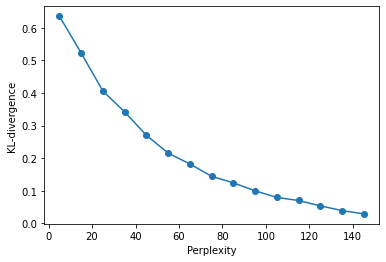

In [10]:
warnings.filterwarnings("ignore")
perplexities = pd.Series(np.arange(5, 151, 10))
kl_divergences = []

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    embedding = tsne.fit(X)
    kl_divergence = tsne.kl_divergence_
    kl_divergences.append(kl_divergence)
    
plt.plot(perplexities, kl_divergences, '-o')
plt.xlabel('Perplexity')
plt.ylabel('KL-divergence')
plt.show()

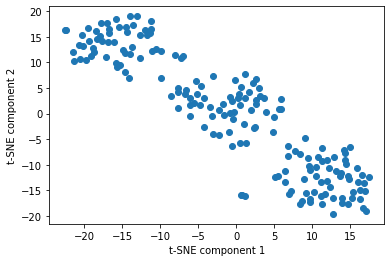

In [19]:
tsne = TSNE(n_components=2, perplexity=20)
embedding = tsne.fit_transform(X)
plt.scatter(embedding[:,0], embedding[:,1])
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

## Question 3

Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.

21775.051869470553


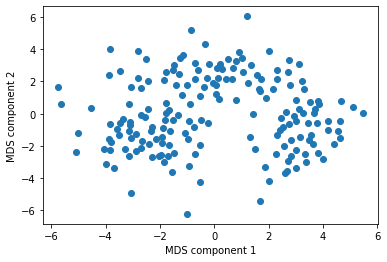

In [17]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

print(mds.stress_)

plt.scatter(X_mds[:,0], X_mds[:,1]) #Making the plot, first 2 dimensions
plt.xlabel('MDS component 1')
plt.ylabel('MDS component 2')
plt.show()

## Question 4

Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?

Optimal K is 3


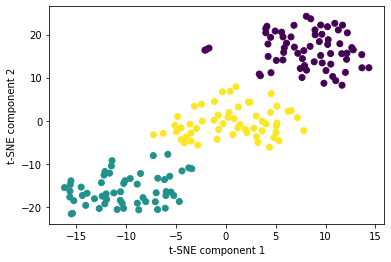

844.7435914874077


In [18]:
tsne = TSNE(n_components=2, perplexity=20)
embedding = tsne.fit_transform(X)

# Determine the optimal number of clusters using the silhouette method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embedding)
    score = silhouette_score(embedding, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because we started with k=2
print("Optimal K is", optimal_k)

# Cluster the data using kMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)
k_meanslabels = kmeans.fit_predict(embedding)

# Plot the wine data with colors representing their clusters
plt.scatter(embedding[:,0], embedding[:,1], c=k_meanslabels)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

# Calculate the total sum of the distance of all points to their respective cluster centers
sum_distances = sum([np.linalg.norm(embedding[i] - kmeans.cluster_centers_[k_meanslabels[i]]) for i in range(len(X))])
print(sum_distances)

## Question 5

Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.

No of clusters: 4


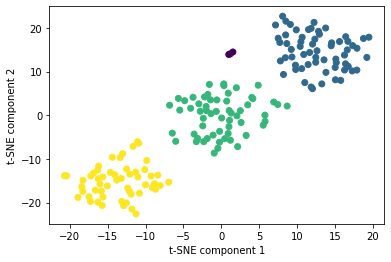

In [14]:
tsne = TSNE(n_components=2, perplexity=20)
embedding = tsne.fit_transform(X)

# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=4, min_samples=7)
labels = dbscan.fit_predict(embedding)

#Calculating the number of clusters
n_clusters=len(set(labels))
print('No of clusters:',n_clusters)

# Plot the wine data with colors representing their clusters
plt.scatter(embedding[:,0], embedding[:,1], c=labels)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

## Extra Credit 1

Given your answers to all of these questions taken together, how many different kinds of wine do you think there are and how do they differ?

In [21]:
data = pd.read_csv("wines.csv")

In [36]:
data["labels"] = k_meanslabels
print("Number of kinds of wine: ",len(set(data["labels"])))

print(data["labels"].value_counts())

Number of kinds of wine:  3
0    65
2    57
1    56
Name: labels, dtype: int64


## Extra Credit 2

Is there anything of interest you learned about wines from exploring this dataset with unsupervised machine learning method that is worth noting and not already covered in the questions above?